## imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import do dataset https://www.kaggle.com/datasets/mirichoi0218/insurance
df = pd.read_csv('insurance.csv')

## Primeira olhada no dataframe

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [12]:
df.groupby('region')['charges'].mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## primeiras pesquisas mais especificas no dataset...

In [6]:
df[(df['smoker'] == 'yes') & (df['sex'] == 'male')]['charges'].mean()

33042.00597528303

In [7]:
df[(df['smoker'] == 'no') & (df['sex'] == 'male')]['charges'].mean()

8087.204731276595

### Verificando a correlação dos dados iniciais

In [8]:
df.corr()

C:\Users\Gui\AppData\Local\Temp\ipykernel_15428\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### verificando a distribuição da coluna charges

C:\Users\Gui\AppData\Local\Temp\ipykernel_15428\265180531.py:3: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



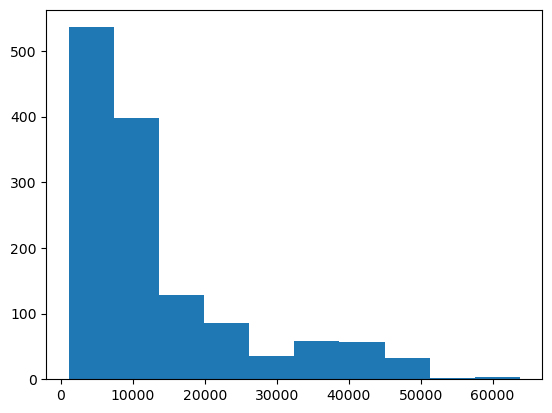

In [82]:
fig, ax = plt.subplots()
ax.hist(df['charges'])
fig.show()

In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Verificando a correlação de todas as outras features com a coluna charges

In [64]:
df.corr()["charges"].sort_values(ascending=False)

charges       1.000000
smoker_yes    0.787251
age           0.299008
bmi           0.198341
male          0.057292
female       -0.057292
smoker_no    -0.787251
Name: charges, dtype: float64

### transformando em números os valores não numericos

In [20]:
one_hot_smoker = pd.get_dummies(df['smoker'])
one_hot_smoker = one_hot.rename(columns={'no':'smoker_no', 'yes':'smoker_yes'})
one_hot_smoker

,smoker_no,smoker_yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1333,1,0
1334,1,0
1335,1,0
1336,1,0


In [29]:
one_hot_region = pd.get_dummies(df['region'])
one_hot_region

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [21]:
one_hot_sex = pd.get_dummies(df['sex'])
one_hot_sex

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [30]:
# df.drop('smoker',axis=1, inplace=True)
# df.drop('sex',axis=1, inplace=True)
df.drop('region', axis=1,inplace=True)

In [36]:
df = df.join(one_hot_sex)
df

,age,bmi,children,charges,female,male
0,19,27.900,0,16884.92400,1,0
1,18,33.770,1,1725.55230,0,1
2,28,33.000,3,4449.46200,0,1
3,33,22.705,0,21984.47061,0,1
4,32,28.880,0,3866.85520,0,1
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1
1334,18,31.920,0,2205.98080,1,0
1335,18,36.850,0,1629.83350,1,0
1336,21,25.800,0,2007.94500,1,0


In [37]:
df = df.join(one_hot_smoker)
df

,age,bmi,children,charges,female,male,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,1,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0
2,28,33.000,3,4449.46200,0,1,1,0
3,33,22.705,0,21984.47061,0,1,1,0
4,32,28.880,0,3866.85520,0,1,1,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0
1334,18,31.920,0,2205.98080,1,0,1,0
1335,18,36.850,0,1629.83350,1,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0


In [38]:
df = df.join(one_hot_region)
df

,age,bmi,children,charges,female,male,smoker_no,smoker_yes,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


### Depois de avaliar melhor, decidi que não vou trabalhar com as features REGION e CHILDREN

In [44]:
df.drop('northeast',axis=1, inplace=True)
df.drop('northwest',axis=1, inplace=True)
df.drop('southeast',axis=1, inplace=True)
df.drop('southwest',axis=1, inplace=True)

In [ ]:
df.drop('children',axis=1, inplace=True)

### splitando meu dataframe, com um teste de 30% e 70% voltados para o treino do meu modelo 

In [58]:
from sklearn.model_selection import train_test_split

Y = df['charges']
X = df.loc[:, df.columns != 'charges']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

#### meu primeiro modelo utilizando regressão linear

In [59]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

#### Não curti muito, percebi que esse modelo tinha uma média de erro muito grande...

In [60]:
from sklearn.metrics import mean_squared_error

preds = lin_reg.predict(x_train)
lin_mse = mean_squared_error(y_train, preds)

lin_rmse = np.sqrt(lin_mse)
lin_rmse

5995.241293735452

### Verificando se o modelo de floresta aleatoria é melhor que o de regressão...

In [61]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

#### Melhor que o modelo anterior...

In [62]:
preds = rf_reg.predict(x_train)
rf_mse = mean_squared_error(y_train, preds)

rf_rmse = np.sqrt(rf_mse)
rf_rmse

1861.4378989324302

### Testando outro modelo de arvore de decisão

In [69]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

#### média de erro identica ao modelo anterior...

In [70]:
preds = tree_reg.predict(x_train)
tree_mse = mean_squared_error(y_train, preds)

tree_rmse = np.sqrt(rf_mse)
tree_rmse

1861.4378989324302

### validando os modelos, decidi que vou trabalhar com o modelo de floresta aleatoria

In [71]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_reg, x_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
rf_rmse_scores = np.sqrt(-scores)
                           
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(rf_rmse_scores)

Scores: [3751.96121094 4112.37684113 4852.59412575 5107.32590121 4487.40879793
 4937.64478202 4686.63274654 5201.90613423 4996.05957136 5912.81397733]
Mean: 4804.672408842105
Standard deviation: 568.8622217848665


In [74]:
scores = cross_val_score(tree_reg, x_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
                           
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [6099.66024365 6077.21930814 8222.93799243 6208.54037581 6464.06257165
 6431.01422704 5388.4406148  6691.17720138 5596.34106819 6592.53833513]
Mean: 6377.193193823133
Standard deviation: 731.0944322788204


In [75]:
scores = cross_val_score(lin_reg, x_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
                           
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_rmse_scores)

Scores: [6127.37428946 5411.52623483 5131.83545663 5921.63196886 5949.65637838
 6426.90165017 5736.0860307  6215.20808209 6397.60592353 6934.63113202]
Mean: 6025.245714666178
Standard deviation: 494.8104453019315


### Otimizando o modelo de floresta aleatoria e verificando quais os melhores parametros possiveis

In [76]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [77]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [78]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30)

### Modelo final,

In [79]:
final_model = grid_search.best_estimator_
final_model_predicts = final_model.predict(x_test)

final_mse = mean_squared_error(y_test, final_model_predicts)
print(np.sqrt(final_mse))

5582.539163603988


### Plot do modelo de floresta aleatoria otimizado com o grid search

In [83]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Scatter(y=y_test.values),
                     go.Scatter(y=final_model_predicts)])
fig.show()
# linhas azuis sao os valores reais
# linhas vermelhas sao os chutes do meu modelo

#### FIM